In [17]:
# Stanza

import time
import xml.etree.ElementTree as ET
import stanza

contenu = ""

fichier = "TGB/5419000.xml"
tree = ET.parse(fichier)
root = tree.getroot()

for text in root.iter("{http://www.tei-c.org/ns/1.0}text"):
    textes = text.itertext()
    for cpt, el in enumerate(textes):
        if el != "\n":
            contenu += el
            contenu += " "

nlp = stanza.Pipeline("fr")

temps = []

intervalles = [100, 500, 1000, 2000, 5000, 10000]
taille_test = 10000
for intervalle in intervalles:
    print(intervalle)
    debut = time.time()
    for i in range(0, len(contenu), intervalle):
        if i > taille_test:
            break
        doc = nlp(contenu[i:i+intervalle])
        #print(i, end=" ")
    fin = time.time()
    print("Temps : %.2f" % (fin-debut))
    temps.append(fin-debut)

2020-06-05 16:02:41 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| ner       | wikiner |

2020-06-05 16:02:41 INFO: Use device: cpu
2020-06-05 16:02:41 INFO: Loading: tokenize
2020-06-05 16:02:41 INFO: Loading: mwt
2020-06-05 16:02:41 INFO: Loading: pos
2020-06-05 16:02:43 INFO: Loading: lemma
2020-06-05 16:02:43 INFO: Loading: depparse
2020-06-05 16:02:44 INFO: Loading: ner
2020-06-05 16:02:47 INFO: Done loading processors!


100
Temps : 58.32
500
Temps : 44.79
1000
Temps : 41.39
2000
Temps : 38.33
5000
Temps : 38.80
10000
Temps : 52.06


In [4]:
import matplotlib.pyplot as plt

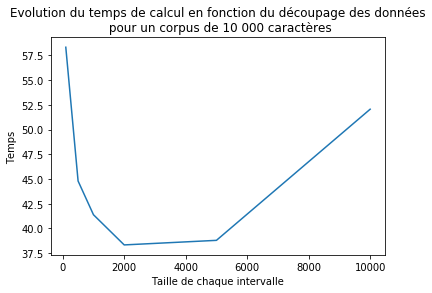

In [20]:

plt.plot(intervalles, temps)
plt.xlabel("Taille de chaque portion")
plt.ylabel("Temps")
plt.title("Evolution du temps de calcul en fonction du découpage des données\n pour un corpus de 10 000 caractères")
plt.savefig("Pyplot/Tests_temps_Stanza")
plt.show()

In [22]:
# Spacy

import time
import xml.etree.ElementTree as ET
import spacy
import fr_core_news_sm

contenu = ""

fichier = "TGB/5419000.xml"
tree = ET.parse(fichier)
root = tree.getroot()

for text in root.iter("{http://www.tei-c.org/ns/1.0}text"):
    textes = text.itertext()
    for cpt, el in enumerate(textes):
        if el != "\n":
            contenu += el
            contenu += " "

nlp = fr_core_news_sm.load()

temps = []

intervalles = [100, 500, 1000, 2000, 5000, 10000]
taille_test = 100000
for intervalle in intervalles:
    print(intervalle)
    debut = time.time()
    for i in range(0, len(contenu), intervalle):
        if i > taille_test:
            break
        doc = nlp(contenu[i:i+intervalle])
        #print(i, end=" ")
    fin = time.time()
    print("Temps : %.2f" % (fin-debut))
    temps.append(fin-debut)

100
Temps : 14.78
500
Temps : 4.62
1000
Temps : 3.85
2000
Temps : 3.64
5000
Temps : 3.76
10000
Temps : 3.95


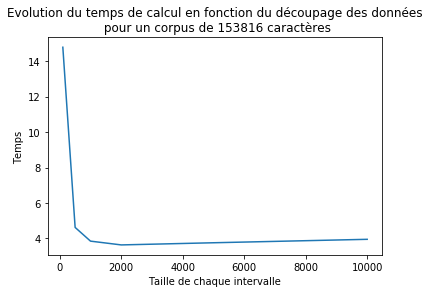

In [23]:
plt.plot(intervalles, temps)
plt.xlabel("Taille de chaque intervalle")
plt.title("Evolution du temps de calcul en fonction du découpage des données\n pour un corpus de %s caractères" % len(contenu))
plt.ylabel("Temps")
plt.savefig("Pyplot/Tests_temps_Spacy")
plt.show()